In [1]:
import pandas as pd
import numpy as np

In [2]:
hr_data = pd.read_csv('hr.csv')

In [3]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
y = hr_data['left']
X = hr_data.drop(['left'], axis = 1)

In [5]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [6]:
X = pd.get_dummies(X, drop_first = True)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10499 entries, 14404 to 2915
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     10499 non-null  float64
 1   last_evaluation        10499 non-null  float64
 2   number_project         10499 non-null  int64  
 3   average_montly_hours   10499 non-null  int64  
 4   time_spend_company     10499 non-null  int64  
 5   Work_accident          10499 non-null  int64  
 6   promotion_last_5years  10499 non-null  int64  
 7   sales_RandD            10499 non-null  uint8  
 8   sales_accounting       10499 non-null  uint8  
 9   sales_hr               10499 non-null  uint8  
 10  sales_management       10499 non-null  uint8  
 11  sales_marketing        10499 non-null  uint8  
 12  sales_product_mng      10499 non-null  uint8  
 13  sales_sales            10499 non-null  uint8  
 14  sales_support          10499 non-null  uint8  
 15 

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
clf = RandomForestClassifier(n_estimators = 15, random_state = 5, n_jobs = -1, oob_score = True)

In [15]:
clf.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(n_estimators=15, n_jobs=-1, oob_score=True,
                       random_state=5)

In [16]:
for w in range(10,300,20):
    clf=RandomForestClassifier(n_estimators = w, random_state = 5, n_jobs = -1, oob_score = True)
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print ('For n_estimators = '+str(w))
    print ('OOB score is '+str(oob))
    print ('************************')

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.9798076007238785
************************
For n_estimators = 30
OOB score is 0.9873321268692257
************************
For n_estimators = 50
OOB score is 0.9881893513667969
************************
For n_estimators = 70
OOB score is 0.9887608343651776
************************
For n_estimators = 90
OOB score is 0.9891418230307648
************************
For n_estimators = 110
OOB score is 0.9892370701971617
************************
For n_estimators = 130
OOB score is 0.9893323173635584
************************
For n_estimators = 150
OOB score is 0.989999047528336
************************
For n_estimators = 170
OOB score is 0.989999047528336
************************
For n_estimators = 190
OOB score is 0.9898085531955424
************************
For n_estimators = 210
OOB score is 0.989522811696352
************************
For n_estimators = 230
OOB score is 0.9894275645299553
************************
For n_estimators = 250
OOB score is 0.9896180588

In [17]:
clf = RandomForestClassifier(n_estimators = 150, random_state = 5, n_jobs = -1, oob_score = True)

In [18]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, n_jobs=-1, oob_score=True,
                       random_state=5)

In [19]:
clf.score(X_train, y_train)

1.0

In [20]:
clf.oob_score_

0.989999047528336

In [21]:
clf.score(X_test, y_test)

0.9906666666666667

In [22]:
clf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=953453411),
 DecisionTreeClassifier(max_features='auto', random_state=236996814),
 DecisionTreeClassifier(max_features='auto', random_state=1592283119),
 DecisionTreeClassifier(max_features='auto', random_state=1423042237),
 DecisionTreeClassifier(max_features='auto', random_state=887852006),
 DecisionTreeClassifier(max_features='auto', random_state=1562238070),
 DecisionTreeClassifier(max_features='auto', random_state=1797920144),
 DecisionTreeClassifier(max_features='auto', random_state=2059200585),
 DecisionTreeClassifier(max_features='auto', random_state=2097710088),
 DecisionTreeClassifier(max_features='auto', random_state=385778404),
 DecisionTreeClassifier(max_features='auto', random_state=479936231),
 DecisionTreeClassifier(max_features='auto', random_state=1703970750),
 DecisionTreeClassifier(max_features='auto', random_state=1142065563),
 DecisionTreeClassifier(max_features='auto', random_state=1521011312),
 DecisionTr

In [23]:
clf.estimators_[1].feature_importances_

array([3.27121242e-01, 1.28494183e-01, 1.16599618e-01, 2.00507061e-01,
       1.73311046e-01, 6.12619749e-03, 3.05762560e-03, 2.19269815e-03,
       1.00622507e-03, 1.92923379e-03, 1.39755244e-05, 1.22125824e-03,
       1.75012846e-03, 4.90612544e-03, 4.17867641e-03, 5.98250716e-03,
       1.83044281e-02, 3.29777101e-03])

In [24]:
imp=[]

for i in clf.estimators_:
    imp.append(i.feature_importances_)

# Average
imp=np.mean(imp,axis=0)

In [25]:
feature_importances = pd.Series(imp, index = X.columns.tolist())

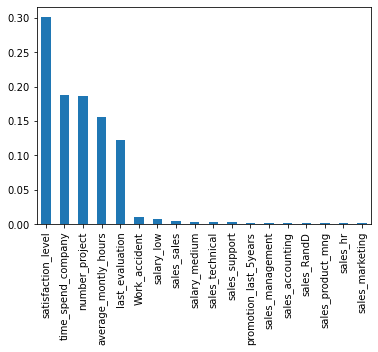

In [26]:
feature_importances.sort_values(ascending = False).plot(kind='bar')